In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import io, color
from sklearn.cluster import KMeans

In [4]:
def show_image(image, title='Image'):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
def save_image(image, filename='image.png'):
    plt.imshow(image)
    plt.axis('off') 
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

In [6]:
def fullscreen_compare(before_image, after_image, title_before="Before", title_after="After"):
    # Create named windows for fullscreen
    cv2.namedWindow(title_before, cv2.WINDOW_NORMAL)
    cv2.setWindowProperty(title_before, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

    # Display the before image first
    img_to_show = before_image.copy()
    cv2.putText(img_to_show, title_before, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow(title_before, img_to_show)

    is_before = True

    while True:
        key = cv2.waitKey(1) & 0xFF

        # Press space to toggle between before and after images
        if key == ord(' '):
            if is_before:
                img_to_show = after_image.copy()
                cv2.putText(img_to_show, title_after, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                cv2.imshow(title_before, img_to_show)
                is_before = False
            else:
                img_to_show = before_image.copy()
                cv2.putText(img_to_show, title_before, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                cv2.imshow(title_before, img_to_show)
                is_before = True

        # Press 'q' to quit comparison
        elif key != 255:  # Any key press exits (excluding no key press which gives 255)
            break

    cv2.destroyAllWindows()

In [7]:
def fullscreen_show(image, title="Image"):
    """Отображает одно изображение в полноэкранном режиме без текста."""
    # Создаем окно и ставим его в полноэкранный режим
    cv2.namedWindow(title, cv2.WINDOW_NORMAL)
    cv2.setWindowProperty(title, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

    # Показываем изображение в полноэкранном режиме
    cv2.imshow(title, image)

    # Ожидаем нажатие клавиши для продолжения
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def sequential_compare(images, titles):
    """Показывает изображения по очереди в полноэкранном режиме без текста."""
    for img, title in zip(images, titles):
        fullscreen_show(img, title)

# TASK 1

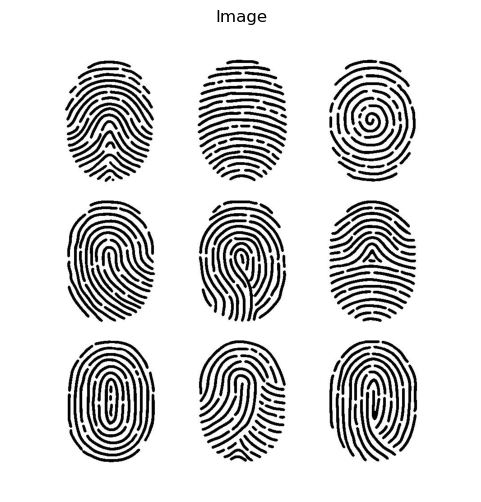

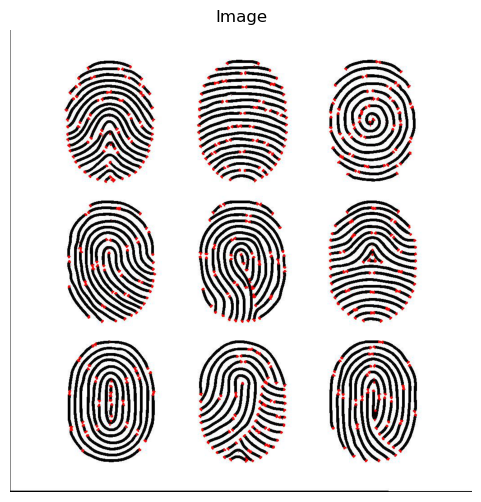

In [8]:
image = io.imread('fingerprints.jpg')
show_image(image)

target = io.imread('resultfp.jpg')
target = cv2.cvtColor(target, cv2.COLOR_RGB2BGR)
show_image(target)

In [9]:
def harris_detector(image, blockSize, ksize, k, threshold=0.01):
    """
    Детектор Харриса для нахождения углов.
    """
    # Преобразуем изображение в градации серого, если оно цветное
    if len(image.shape) == 3:  # Проверяем, если изображение RGB/BGR
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        result = image.copy()
    else:
        gray = image.copy()
        result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Преобразуем изображение в формат float32 (требование для cornerHarris)
    gray = np.float32(gray)

    # Применяем детектор Харриса
    harris_response = cv2.cornerHarris(gray, blockSize=blockSize, ksize=ksize, k=k)
    
    # Дилация, чтобы расширить углы и сделать их более толстыми
    dilation_size = 0
    harris_response = cv2.dilate(harris_response, None, iterations=dilation_size)

    # Эрозия
    erosion_size = 0
    harris_response = cv2.erode(harris_response, None, iterations=erosion_size)

    # Определяем углы на основе порога
    result[harris_response > threshold * harris_response.max()] = [0, 0, 255]  # Красные точки

    return result

### Параметры и их влияние

### blockSize
- Диапазон значений: 2-10 (обычно 2-5 для мелких деталей).
Как влияет:
- Меньшие значения (2-3) — детектор выделяет более мелкие особенности, но может стать чувствительным к шуму.
- Большие значения (4-10) — детектор выделяет только крупные особенности, пропуская мелкие детали.

### ksize
- Диапазон значений: 3, 5, 7 (всегда нечетное).
Как влияет:
- Меньшие значения (3) — детектор лучше выделяет резкие углы, но может быть менее устойчивым к шуму.
- Большие значения (5-7) — детектор становится менее чувствительным к шуму, но может сглаживать мелкие углы.

### k
- Диапазон значений: 0.04-0.15 (обычно 0.04-0.06).
Как влияет:
- Меньшие значения (0.04) — детектор выделяет больше углов, включая слабые.
- Большие значения (0.06-0.15) — детектор выделяет только четкие углы, пропуская слабые особенности.

### threshold
- Диапазон значений: 0.001-0.1.
Как влияет:
- Меньшие значения (0.001-0.005) — выделяются слабые углы и шум.
- Большие значения (0.01-0.1) — выделяются только наиболее сильные углы.

In [1]:
# Параметры Харриса
blockSize = 6
ksize = 5
k = 0.08
threshold = 0.01  # Порог для выделения углов

corners_detected = harris_detector(image, blockSize, ksize, k, threshold)

NameError: name 'harris_detector' is not defined

In [ ]:
fullscreen_compare(corners_detected, target, title_before="YOur result", title_after="Target")

# TASK 2

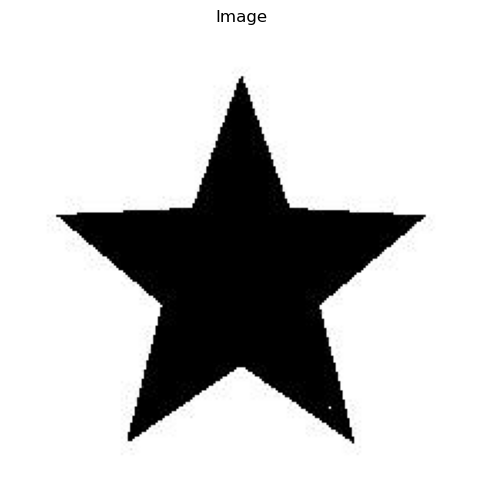

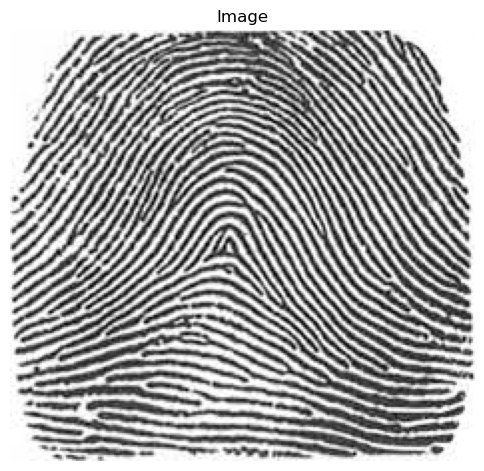

In [12]:
image_star = io.imread('star.jpg')
image_fp2 = io.imread('fp2.jpg')
show_image(image_star)
show_image(image_fp2)

In [13]:
def rotate_image(image, angle):
    """
    Поворот изображения на заданный угол.
    """
    # Получаем размеры изображения
    rows, cols = image.shape[:2]

    # Находим центр изображения
    center = (cols / 2, rows / 2)

    # Создаем матрицу поворота
    matrix = cv2.getRotationMatrix2D(center, angle, 1)

    # Поворачиваем изображение
    rotated_image = cv2.warpAffine(image, matrix, (cols, rows))

    return rotated_image

In [14]:
def display_rotated_images_with_corners(image, num_rotations, blockSize, ksize, k, threshold=0.01):
    """
    Поворачивает изображение, находит углы и отображает результаты.
    """
    images = []
    titles = []
    step = 360 / num_rotations  # Количество поворотов

    for i in range(num_rotations):
        angle = i * step
        rotated_image = rotate_image(image, angle)
        corners_detected = harris_detector(rotated_image, blockSize, ksize, k, threshold)
        
        images.append(corners_detected)
        titles.append(f"Angle {angle}°")
    
    sequential_compare(images, titles)


## ПРИМЕР НЕСИММЕТРИЧНОСТИ

In [15]:
# Параметры Харриса
blockSize = 6
ksize = 3
k = 0.04
threshold = 0.01  # Порог для выделения углов
num_rotations = 5

display_rotated_images_with_corners(image_star, num_rotations, blockSize, ksize, k, threshold)

## РЕШЕНИЯ

In [16]:
# Параметры Харриса
blockSize = 6
ksize = 13
k = 0.15
threshold = 0.01  # Порог для выделения углов
num_rotations = 5

display_rotated_images_with_corners(image_star, num_rotations, blockSize, ksize, k, threshold)

In [17]:
# Параметры Харриса
blockSize = 2
ksize = 1
k = 0.04
threshold = 0.01  # Порог для выделения углов
num_rotations = 5

# ПЛОХО ВИЗУАЛИЗИРУЕТСЯ, НО ЗНАЧЕНИЯ НУЖНО ДЕЛАТЬ МЕНЬШЕ
display_rotated_images_with_corners(image_fp2, num_rotations, blockSize, ksize, k, threshold)

# TASK 3

(1024, 1024, 3) (216, 233, 3) (137, 132, 3)


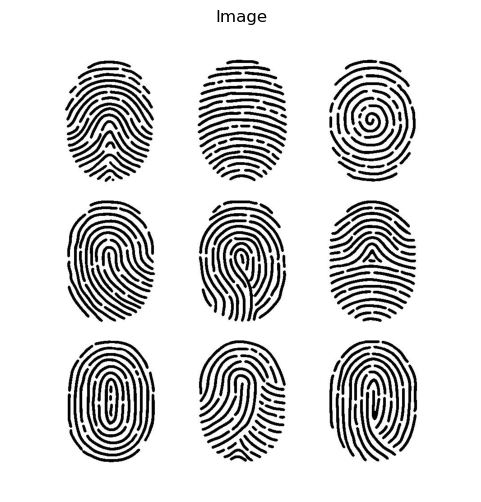

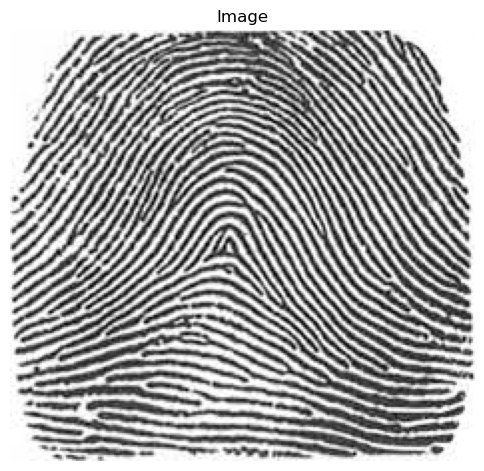

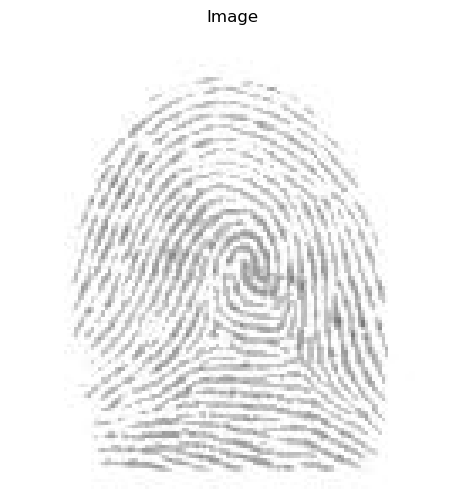

In [18]:
img1 = cv2.imread('fingerprints.jpg')  
img2 = cv2.imread('fp2.jpg')           
img3 = cv2.imread('fp3.jpg') 

print(img1.shape, img2.shape, img3.shape)

show_image(img1)
show_image(img2)
show_image(img3)

### Что делать

- Алгоритм Харриса плохо устойчив к изображениям разных размеров, поэтому параметры придется подбирать разные под каждую картинку для детектора. Отпечатки fp2, fp3 более детализованы. Также fp2 занимает больший масштаб. Детектор Харрис к нему не устойчив.

- Детектор Харриса устойчив к линейным изменениям яркости, но также зависит от градиентов изменения контраста. Изображение fp3 слишком тусклое. Изменим яркость fp3 для лучшей сходимости.

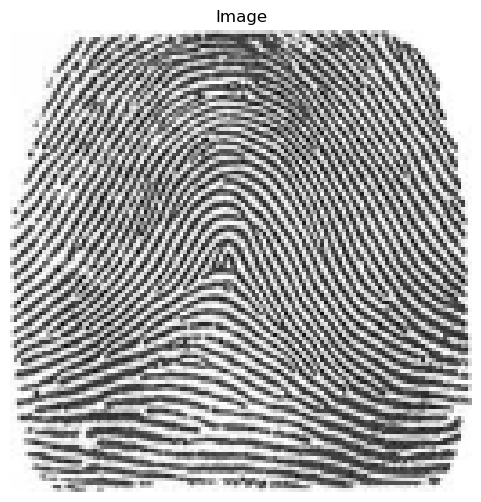

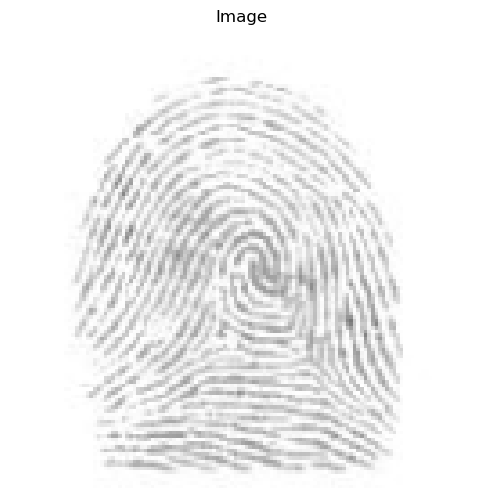

In [19]:
target_height, target_width = 128, 128
img2 = cv2.resize(img2, (target_width, target_height))
img3 = cv2.resize(img3, (target_width, target_height))

show_image(img2)
show_image(img3)

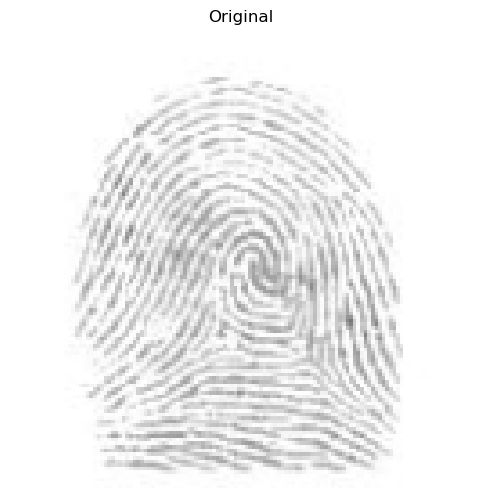

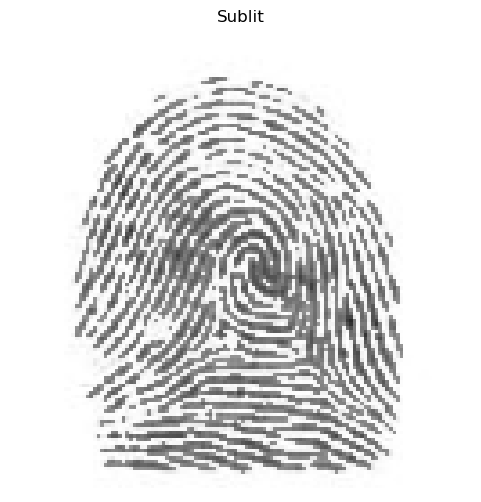

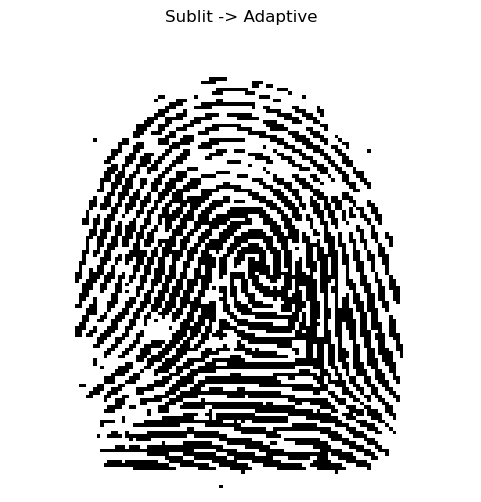

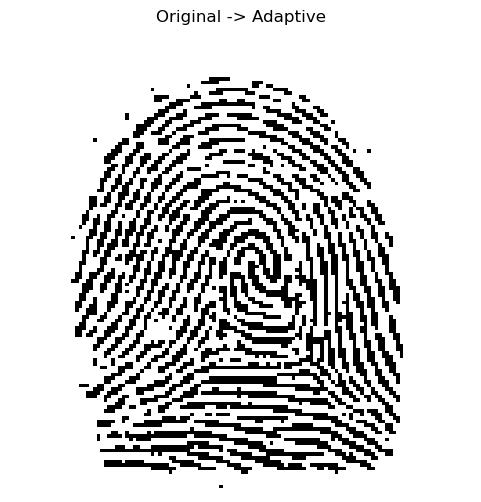

In [20]:
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

gauss_block_size = 11
gauss_C = 5

# 1) 
img3_adaptive1 = cv2.adaptiveThreshold(img3_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, gauss_block_size, gauss_C)


# 2) Порог для сдвига серых участков к черному (оставляем белые пиксели без изменений)
threshold_value = 230  
mask = img3_gray < threshold_value

img3_sublit = np.copy(img3_gray)
img3_sublit[mask] = np.maximum(0, img3_sublit[mask] - 80)

img3_adaptive2 = cv2.adaptiveThreshold(img3_sublit, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, gauss_block_size, gauss_C)

show_image(img3_gray, "Original") 
show_image(img3_sublit, "Sublit")
show_image(img3_adaptive2, "Sublit -> Adaptive")
show_image(img3_adaptive1, "Original -> Adaptive")


In [53]:
def remove_small_black_regions(image, min_size):
    """
    Убирает маленькие связные области черных пикселей с заданным минимальным размером.
    """
    # Инвертируем изображение, чтобы черный стал белым (для connectedComponents)
    inverted_image = cv2.bitwise_not(image)

    # Поиск связных компонент
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(inverted_image, connectivity=8)

    # Создаем маску для больших компонент
    large_components = np.zeros_like(image, dtype=np.uint8)

    for i in range(1, num_labels):  # Пропускаем фон (i=0)
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            # Добавляем текущую компоненту к маске
            large_components[labels == i] = 255

    # Инвертируем обратно, чтобы получить финальное изображение
    cleaned_image = cv2.bitwise_not(large_components)

    return cleaned_image

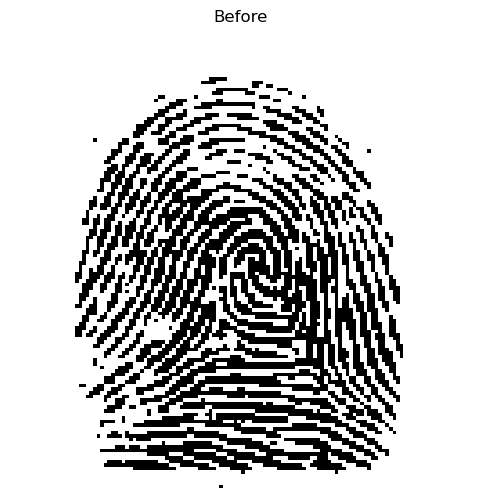

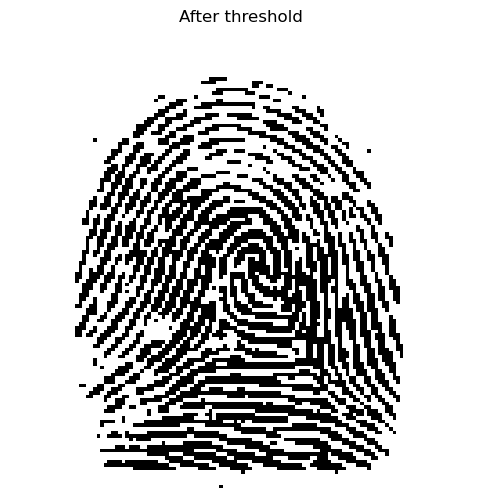

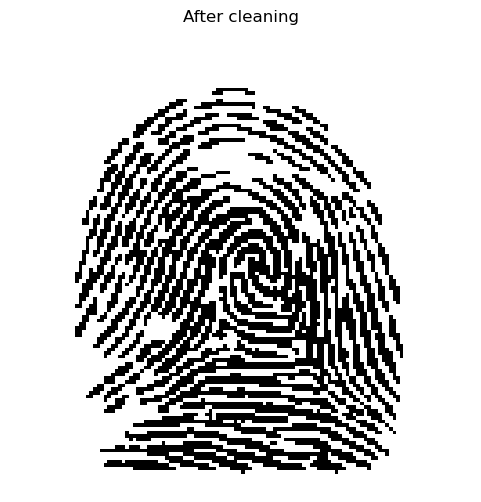

In [62]:
show_image(img3, "Before")
img3 = img3_adaptive2
show_image(img3_adaptive2, "After threshold")
img3_cleaned = remove_small_black_regions(img3, min_size=10)
show_image(img3_cleaned, "After cleaning")
img3 = img3_cleaned

In [63]:
def split_image(image):
    h, w = image.shape[:2]
    step_h, step_w = h // 3, w // 3
    parts = [image[y:y + step_h, x:x + step_w] for y in range(0, h, step_h) for x in range(0, w, step_w)]
    return parts

def crop_to_multiple(image, multiple):
    h, w = image.shape[:2]
    h_cropped = (h // multiple) * multiple
    w_cropped = (w // multiple) * multiple
    return image[:h_cropped, :w_cropped]


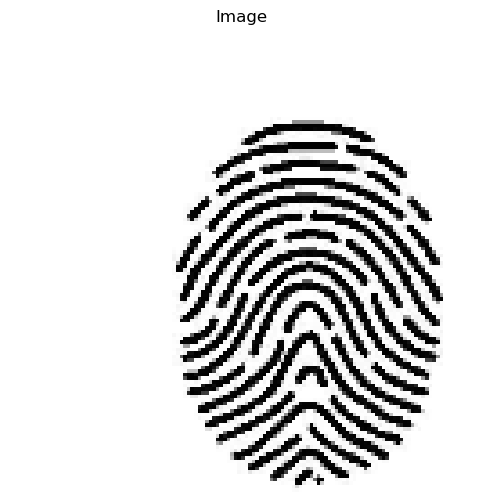

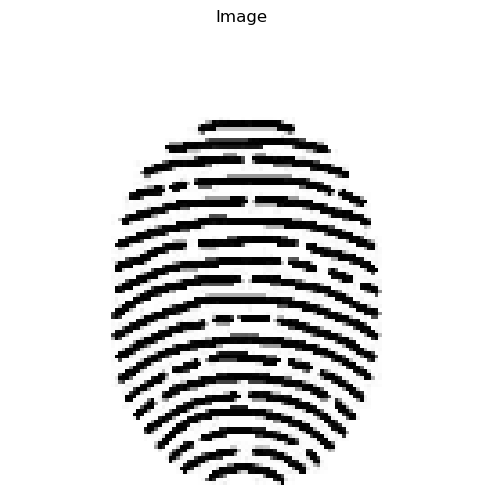

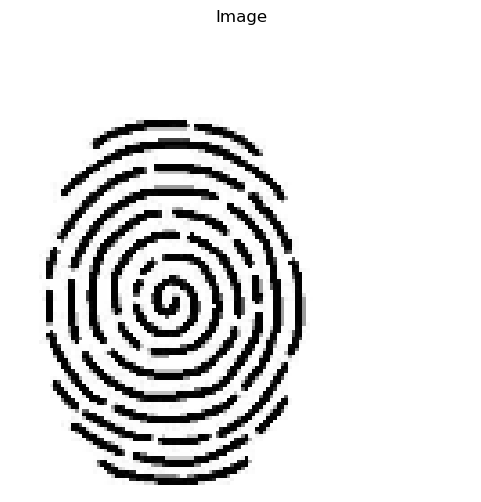

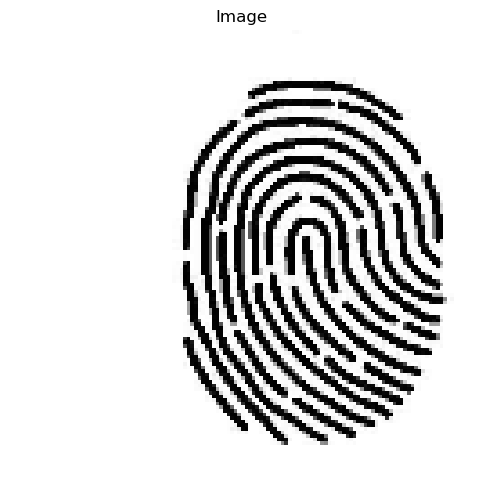

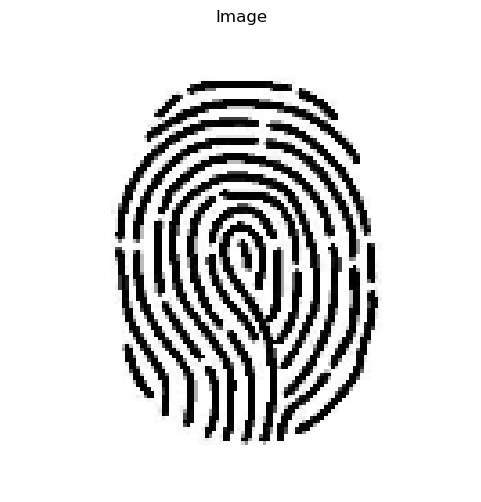

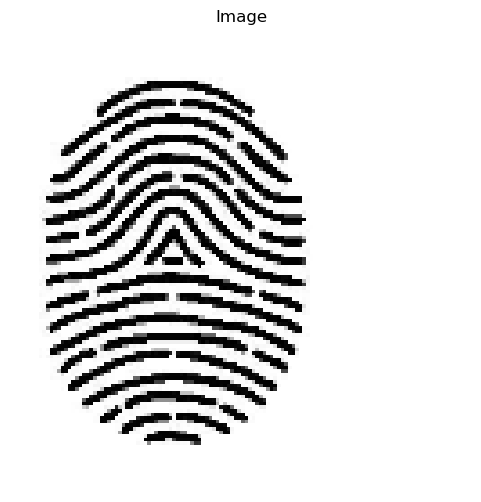

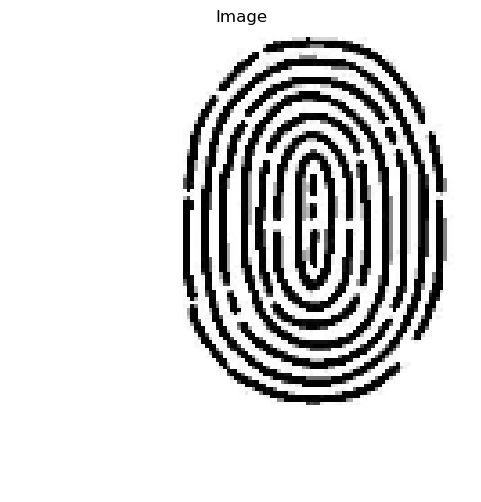

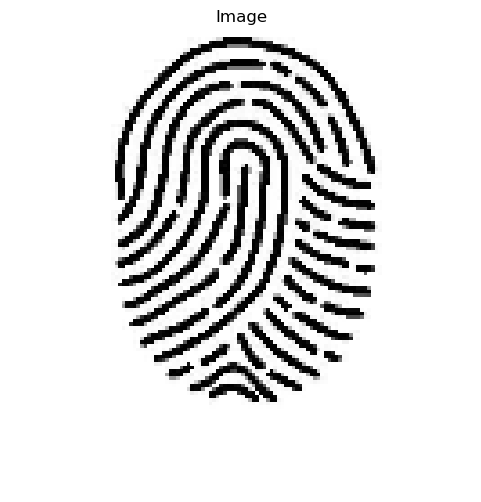

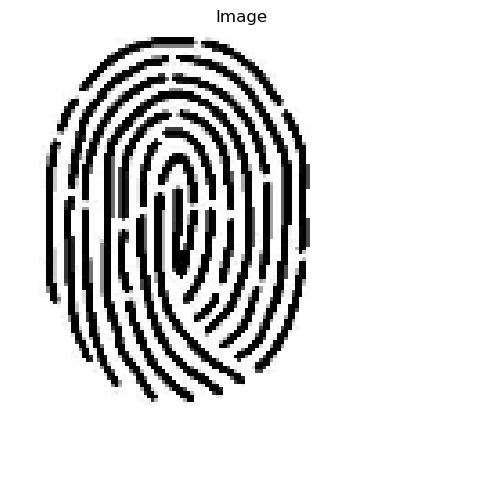

9

In [64]:
cropped = crop_to_multiple(img1, 3)
parts = split_image(cropped)

def resize_part(part):
    return cv2.resize(part, (target_width, target_height))

resized_parts = list(map(resize_part, parts))

for resized_part in resized_parts:
    show_image(resized_part)

len(parts)

In [2]:
parts = resized_parts
print(img2.shape, img3.shape, [part.shape for part in parts])

NameError: name 'resized_parts' is not defined

In [3]:
def detect_corners_with_harris(image, params):
    corners_detected = harris_detector(
        image,
        blockSize=params['blockSize'],
        ksize=params['ksize'],
        k=params['k'],
        threshold=params['threshold']
    )
    return corners_detected

param_sets = [
    {'blockSize': 2, 'ksize': 1, 'k': 0.22, 'threshold': 0.01},  
    {'blockSize': 3, 'ksize': 5, 'k': 0.24, 'threshold': 0.01},  
    {'blockSize': 3, 'ksize': 1, 'k': 0.22, 'threshold': 0.01},  
]

corners_img2 = detect_corners_with_harris(img2, param_sets[0])
corners_img3 = detect_corners_with_harris(img3, param_sets[1])
parts_corners = [detect_corners_with_harris(part, param_sets[2]) for part in parts]

NameError: name 'img2' is not defined

In [119]:
# show_image(img2)
# show_image(corners_img2)

# show_image(img3)
# show_image(corners_img3)

# for part in parts_corners:
#     show_image(part)